In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [60]:
def rotatonMatrixZ(theta):
    
    theta = np.deg2rad(theta)
    ct = np.cos(theta)
    st = np.sin(theta)
    
    return np.matrix([ct, -st, 0 ,\
                      st, ct, 0, \
                      0, 0, 1]).reshape(3,3)

def rotatonMatrixY(theta):
    
    theta = np.deg2rad(theta)
    ct = np.cos(theta)
    st = np.sin(theta)
    
    return np.matrix([ct, 0, st,\
                      0, 1, 0,\
                      -st, 0, ct]).reshape(3,3)


def rotationMatrixX(theta):
    
    theta = np.deg2rad(theta)
    ct = np.cos(theta)
    st = np.sin(theta)
    
    return np.matrix([1, 0, 0,\
                      0, ct, -st,\
                      0, st, ct]).reshape(3,3)

def h1Inh20(angle):
    phi = 90 - angle
    theta = np.deg2rad(90 - 52.25)
    d = 0.96
    st = np.sin(theta)
    ct = np.cos(theta)
    
    R = rotationMatrixX(phi)
    x = d * st 
    y = 0
    z = d * ct 
    
    hydrogen_1 = np.matmul(R, np.matrix([x, y, z]).T)
    hydrogen_2 = np.matmul(R, np.matrix([-x, y, z]).T)
    
    return hydrogen_1,\
           hydrogen_2 

# r1 is row vector and r2 is row vectors   
def distanceR12(r1,r2):
    #return np.linalg.norm((r1-r2).T)
    r = r1 - r2
    
    return np.sqrt( r * r.T)[0,0]



# hydrogen and oxygen are column vectors
def aTop(hydrogen, oxygen):
    a = 2.77
    distH = []
    distO = []
    
    for count in range(6):
        position = np.matrix([a * np.cos(count * np.deg2rad(60)), a * np.sin(count * np.deg2rad(60)) ,0])
        distH.append(distanceR12(hydrogen.T,position))
        distO.append(distanceR12(oxygen.T, position))
        
        
    distH.append(distanceR12(hydrogen.T,np.matrix([0,0,0]))) 
    distO.append(distanceR12(oxygen.T, np.matrix([0,0,0])))
    return distH, distO
    
        
def hollow(hydrogen, oxygen):
    distH = []
    distO = []
    
    a = 2.77
    
    p1 = np.matrix([0, a / np.sqrt(3), 0])
    p2 = np.matrix([-a / 2, -a * np.sqrt(3) / 6, 0 ])
    p3 = np.matrix([a / 2, -a * np.sqrt(3) / 6, 0 ])
    
    for atom in [p1, p2, p3]:
        distH.append(distanceR12(hydrogen.T, atom))
        distO.append(distanceR12(oxygen.T, atom))
        
    return distH, distO


def bridge(hydrogen, oxygen):
    distH = []
    distO = []
   
    
    a = 2.77
    b = 4.8
    
    p1 = np.matrix([0, a / 2, 0])
    p2 = np.matrix([0, -a /2 , 0 ])
    p3 = np.matrix([b / 2, 0, 0 ])
    p4 = np.matrix([-b / 2, 0, 0 ])
    
    for atom in [p1, p2, p3, p4]:
        distH.append(distanceR12(hydrogen.T,atom))
        distO.append(distanceR12(oxygen.T, atom))
    
    
    return distH, distO
 

In [36]:
delta_angle = 1
range_val = 360/delta_angle
angles = [ steps * delta_angle for steps in range(0,int(range_val))]
d_oxygen = 2.4
orientation = 14

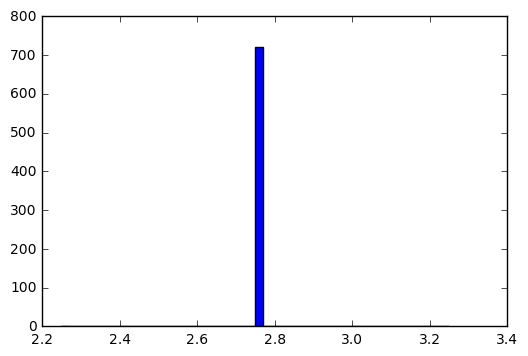

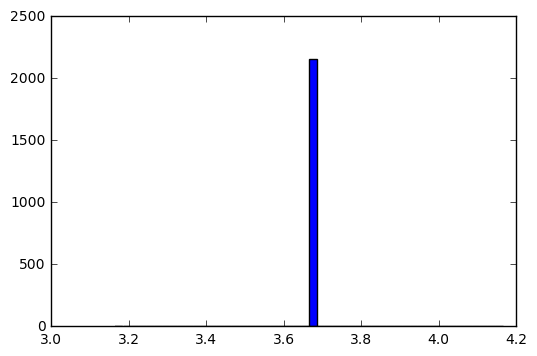

In [37]:
# hydrogen_1 and hydrogen_2 distance in top site

oxygen = d_oxygen * np.matrix([0, 0, 1]).T
# angle made by water with surface
#orientation = -90
atop_hydrogen_write = open("../PtWaterAdsorption/aTop_distance_hydrogen.dat",'w')
atop_oxygen_write = open("../PtWaterAdsorption/aTop_distance_oxygen.dat",'w')
atop_hydrogen_write.write("#theta\tpH1\tpH2\tpH3\tpH4\tpH5\tpH6\tpH0\n")
atop_oxygen_write.write("#theta\tpO1\tpO2\tpO3\tpO4\tpO5\tpO6\tpO0\n")
atop_hydrogen_write.close()
atop_oxygen_write.close()
for angle in angles:
    R = rotatonMatrixZ(angle)
    hydrogen_1, hydrogen_2 = h1Inh20(orientation)
    hydrogen_1 = np.matmul(R, hydrogen_1)
    
    hydrogen_2 = np.matmul(R, hydrogen_2)
    
    
    hydrogen_1 = hydrogen_1 + np.matrix([0,0,d_oxygen]).T
    hydrogen_2 = hydrogen_2 + np.matrix([0,0,d_oxygen]).T

    distance_of_h1, distance_of_oxygen = aTop(hydrogen_1, oxygen)
    distane_of_h2, _ = aTop(hydrogen_2, oxygen)
    atop_hydrogen_write = open("../PtWaterAdsorption/aTop_distance_hydrogen.dat",'a')
    atop_oxygen_write = open("../PtWaterAdsorption/aTop_distance_oxygen.dat",'a')
    
    for distance in [distance_of_h1, distane_of_h2]:
        atop_hydrogen_write.write("%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\n"\
                  %(angle,distance[0],distance[1],distance[2],distance[3],distance[4],distance[5],distance[6]))
    atop_hydrogen_write.close()
    
    
    atop_oxygen_write.write("%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\n"\
                  %(angle,distance_of_oxygen[0],distance_of_oxygen[1],distance_of_oxygen[2]\
                    ,distance_of_oxygen[3],distance_of_oxygen[4],distance_of_oxygen[5], distance_of_oxygen[6]))
    atop_oxygen_write.close()

    
    


atop_data_hydrogen = pd.read_csv("../PtWaterAdsorption/aTop_distance_hydrogen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3','p4','p5','p6', 'p7'],skiprows=1)

atop_data_oxygen = pd.read_csv("../PtWaterAdsorption/aTop_distance_oxygen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3','p4','p5','p6', 'p7'],skiprows=1)

p_top_hydrogen = atop_data_hydrogen['p7'].values
#for pos in range(2,7):
#    p_top_hydrogen = np.concatenate((p_top_hydrogen,atop_data_hydrogen['p%d'%(pos)]),axis=0)
    
    
p_top_oxygen = atop_data_oxygen['p1'].values
for pos in range(2,7):
    p_top_oxygen = np.concatenate((p_top_oxygen,atop_data_oxygen['p%d'%(pos)]),axis=0)

plt.hist(p_top_hydrogen,50)
plt.show()
plt.hist(p_top_oxygen, 50)
plt.show()


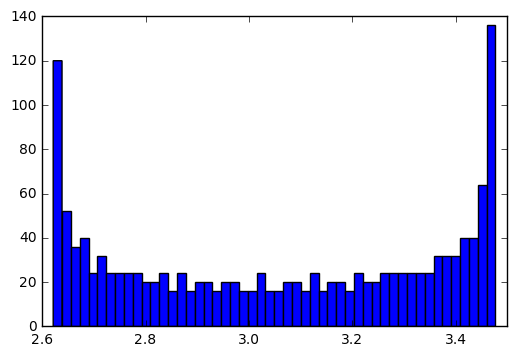

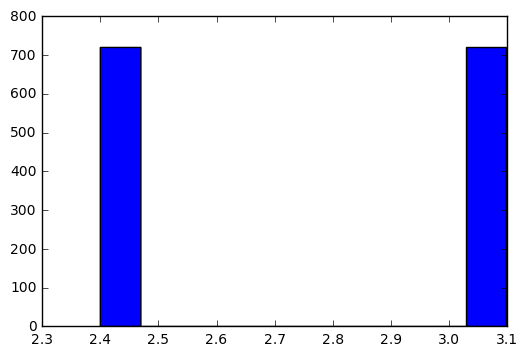

In [38]:
#bridge
distance_oxygen = np.sqrt(d_oxygen**2-(2.77/2)**2)
oxygen = distance_oxygen * np.matrix([0, 0, 1]).T

#orientation = -90

bridge_hydrogen_write = open("../PtWaterAdsorption/bridge_distance_hydrogen.dat",'w')
bridge_oxygen_write = open("../PtWaterAdsorption/bridge_distance_oxygen.dat",'w')
bridge_oxygen_write.write("#theta\tp1\tp2\tp3\tp4\n")
bridge_hydrogen_write.write("#theta\tp1\tp2\tp3\tp4\n")
bridge_oxygen_write.close()
bridge_hydrogen_write.close()

for angle in angles:
    R = rotatonMatrixZ(angle)
    hydrogen_1, hydrogen_2 = h1Inh20(orientation)
    hydrogen_1 = np.matmul(R, hydrogen_1)
    
    hydrogen_2 = np.matmul(R, hydrogen_2)
    
    
    hydrogen_1 = hydrogen_1 + np.matrix([0,0,d_oxygen]).T
    hydrogen_2 = hydrogen_2 + np.matrix([0,0,d_oxygen]).T

    distance_of_h1, distance_of_oxygen = bridge(hydrogen_1, oxygen)
    distane_of_h2, _ = bridge(hydrogen_2, oxygen)
    
    bridge_hydrogen_write = open("../PtWaterAdsorption/bridge_distance_hydrogen.dat",'a')
    bridge_oxygen_write = open("../PtWaterAdsorption/bridge_distance_oxygen.dat",'a')
    
    
    for distance in [distance_of_h1, distane_of_h2]:
        bridge_hydrogen_write.write("%f\t%f\t%f\t%f\t%f\n"\
                  %(angle,distance[0],distance[1],distance[2],distance[3]))
    bridge_hydrogen_write.close()
    
    bridge_oxygen_write.write("%f\t%f\t%f\t%f\t%f\n"\
                  %(angle,distance_of_oxygen[0],distance_of_oxygen[1],distance_of_oxygen[2],distance_of_oxygen[3]))
    bridge_oxygen_write.close()
    
    
bridge_data_hydrogen = pd.read_csv("../PtWaterAdsorption/bridge_distance_hydrogen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3','p4'],skiprows=1)

bridge_data_oxygen = pd.read_csv("../PtWaterAdsorption/bridge_distance_oxygen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3','p4'],skiprows=1)

p_bridge_hydrogen = bridge_data_hydrogen['p1'].values
for pos in range(2,3):
    p_bridge_hydrogen = np.concatenate((p_bridge_hydrogen, bridge_data_hydrogen['p%d'%(pos)]),axis=0)
    
    
p_bridge_oxygen = bridge_data_oxygen['p1'].values
for pos in range(2,5):
    p_bridge_oxygen = np.concatenate((p_bridge_oxygen,bridge_data_oxygen['p%d'%(pos)]),axis=0)

plt.hist(p_bridge_hydrogen,50)
plt.show()
plt.hist(p_bridge_oxygen)
plt.show()


1.789515763179153


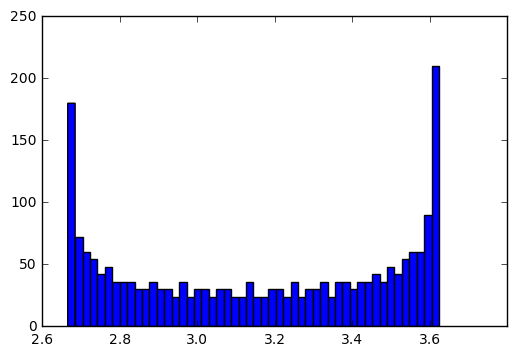

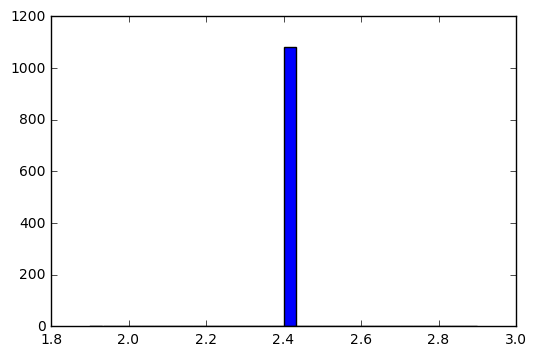

In [39]:

a = 2.77
dist_oxygen = np.sqrt(d_oxygen**2 - a**2/3)
print(dist_oxygen)
oxygen = dist_oxygen * np.matrix([0, 0, 1]).T


hollow_hydrogen_write = open("../PtWaterAdsorption/hollow_distance_hydrogen.dat",'w')
hollow_oxygen_write = open("../PtWaterAdsorption/hollow_distance_oxygen.dat",'w')
hollow_oxygen_write.write("#theta\tp1\tp2\tp3\n")
hollow_hydrogen_write.write("#theta\tp1\tp2\tp3\n")
hollow_oxygen_write.close()
hollow_hydrogen_write.close()

for angle in angles:
    R = rotatonMatrixZ(angle)
#    orientation = -90
    hydrogen_1, hydrogen_2 = h1Inh20(orientation)
    hydrogen_1 = np.matmul(R, hydrogen_1)
    
    hydrogen_2 = np.matmul(R, hydrogen_2)
    
    
    hydrogen_1 = hydrogen_1 + np.matrix([0,0,d_oxygen]).T
    hydrogen_2 = hydrogen_2 + np.matrix([0,0,d_oxygen]).T

    distance_of_h1, distance_of_oxygen = hollow(hydrogen_1, oxygen)
    distane_of_h2, _ = hollow(hydrogen_2, oxygen)
    
    hollow_hydrogen_write = open("../PtWaterAdsorption/hollow_distance_hydrogen.dat",'a')
    hollow_oxygen_write = open("../PtWaterAdsorption/hollow_distance_oxygen.dat",'a')
    
    
    for distance in [distance_of_h1, distane_of_h2]:
        hollow_hydrogen_write.write("%f\t%f\t%f\t%f\n"\
                  %(angle,distance[0],distance[1],distance[2]))
    hollow_hydrogen_write.close()
    
    hollow_oxygen_write.write("%f\t%f\t%f\t%f\n"\
                  %(angle,distance_of_oxygen[0],distance_of_oxygen[1],distance_of_oxygen[2]))
    hollow_oxygen_write.close()
    
    
hollow_data_hydrogen = pd.read_csv("../PtWaterAdsorption/hollow_distance_hydrogen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3'],skiprows=1)

hollow_data_oxygen = pd.read_csv("../PtWaterAdsorption/hollow_distance_oxygen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3'],skiprows=1)

p_hollow_hydrogen = hollow_data_hydrogen['p1'].values
for pos in range(2,4):
    p_hollow_hydrogen = np.concatenate((p_hollow_hydrogen, hollow_data_hydrogen['p%d'%(pos)]),axis=0)
    
    
p_hollow_oxygen = hollow_data_oxygen['p1'].values
for pos in range(2,4):
    p_hollow_oxygen = np.concatenate((p_hollow_oxygen, hollow_data_oxygen['p%d'%(pos)]),axis=0)

plt.hist(p_hollow_hydrogen,50)
plt.show()
plt.hist(p_hollow_oxygen, 30)
plt.show()


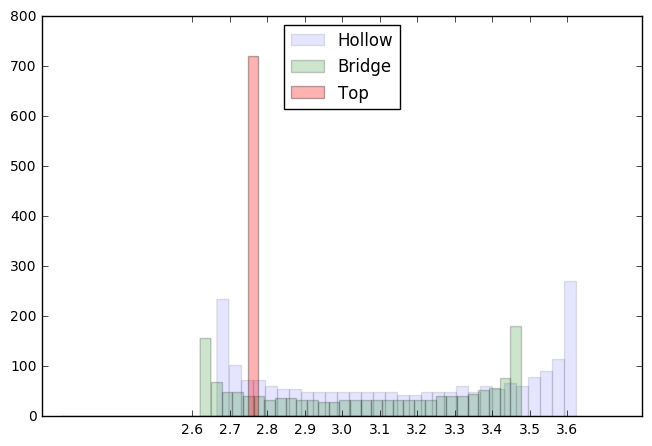

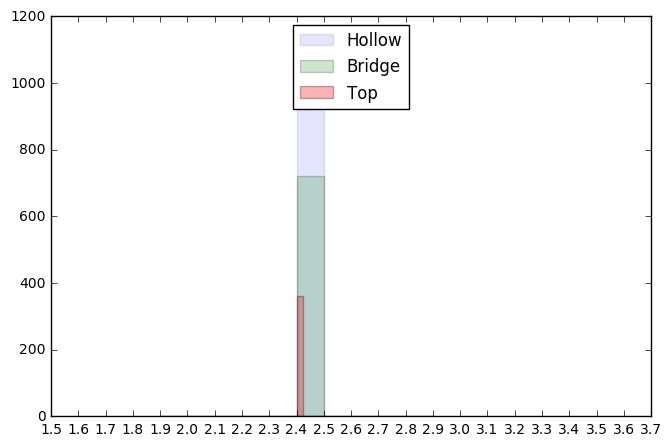

In [44]:
atop_data_hydrogen = pd.read_csv("../PtWaterAdsorption/aTop_distance_hydrogen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3','p4','p5','p6','p7'],skiprows=1)

atop_data_oxygen = pd.read_csv("../PtWaterAdsorption/aTop_distance_oxygen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3','p4','p5','p6','p7'],skiprows=1)

p_top_hydrogen = atop_data_hydrogen['p7'].values
#for pos in range(2,7):
#    p_top_hydrogen = np.concatenate((p_top_hydrogen,atop_data_hydrogen['p%d'%(pos)]),axis=0)
    
    
p_top_oxygen = atop_data_oxygen['p7'].values
#for pos in range(2,7):
#    p_top_oxygen = np.concatenate((p_top_oxygen,atop_data_oxygen['p%d'%(pos)]),axis=0)
    
    

    
bridge_data_hydrogen = pd.read_csv("../PtWaterAdsorption/bridge_distance_hydrogen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3','p4'],skiprows=1)

bridge_data_oxygen = pd.read_csv("../PtWaterAdsorption/bridge_distance_oxygen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3','p4'],skiprows=1)

p_bridge_hydrogen = bridge_data_hydrogen['p1'].values
for pos in range(2,3):
    p_bridge_hydrogen = np.concatenate((p_bridge_hydrogen, bridge_data_hydrogen['p%d'%(pos)]),axis=0)
    
    
p_bridge_oxygen = bridge_data_oxygen['p1'].values
for pos in range(2,3):
    p_bridge_oxygen = np.concatenate((p_bridge_oxygen,bridge_data_oxygen['p%d'%(pos)]),axis=0)

    

    
    
hollow_data_hydrogen = pd.read_csv("../PtWaterAdsorption/hollow_distance_hydrogen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3'],skiprows=1)

hollow_data_oxygen = pd.read_csv("../PtWaterAdsorption/hollow_distance_oxygen.dat",sep="\t",\
                        names = ['theta','p1','p2','p3'],skiprows=1)

p_hollow_hydrogen = hollow_data_hydrogen['p1'].values
for pos in range(2,4):
    p_hollow_hydrogen = np.concatenate((p_hollow_hydrogen, hollow_data_hydrogen['p%d'%(pos)]),axis=0)
    
    
p_hollow_oxygen = hollow_data_oxygen['p1'].values
for pos in range(2,4):
    p_hollow_oxygen = np.concatenate((p_hollow_oxygen, hollow_data_oxygen['p%d'%(pos)]),axis=0)
    

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.hist(p_hollow_hydrogen,30, color='blue', alpha =  0.1, label = 'Hollow')
plt.hist(p_bridge_hydrogen,30, color='green', alpha =  0.2, label = 'Bridge')
plt.hist(p_top_hydrogen, 40, color='red', alpha =  0.3, label = 'Top')
plt.xticks(np.arange(2.6,3.7,.1))
#plt.vlines(3.68, 0, 50)
plt.legend(loc = 9)

plt.savefig('../PtWaterAdsorption/parallel.ps', dpi =100)
plt.show()



fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.hist(p_hollow_oxygen,10, color='blue', alpha =  0.1, label = 'Hollow')
plt.hist(p_bridge_oxygen,10, color='green', alpha =  0.2, label = 'Bridge')
plt.hist(p_top_oxygen, 40, color='red', alpha =  0.3, label = 'Top')
plt.legend(loc = 9)
plt.xticks(np.arange(1.5,3.8,.1))
plt.savefig('../PtWaterAdsorption/secondOxygen.pdf')
plt.show()

In [41]:
oxygen = d_oxygen * np.matrix([0, 0, 1]).T

## Pt-H distance distribution 
### Pt coordinates


In [109]:
inputFile =  "../../DREAM/FDEAMCrystalCalculations/PtCoord.dat"
fileInput = open(inputFile)
lines = fileInput.readlines()
coord=[]
for line in lines:
    pos = str.split(line)
    coord.append([float(pos[0]),float(pos[1]),float(pos[2])])
fileInput.close()
position = np.array(coord)
len(position)

79

## Cooridnates with respec to Atop, Bridge and Hollow 

In [63]:
atop_pos = position - np.array([[-2.000417,0.692965,12.447672]])
hollow_pos = position - np.array([[-1.20025033,  2.078894,   12.447672  ]])
bridge_pos = position - np.array([[-2.000417,  2.078894, 12.447672]])

## Function to calculate the distances of oxygen and hydrogen

In [64]:
def aTop(hydrogen, oxygen, pt_positions):
    a = 2.77
    distH = []
    distO = []
    
    for pt_position in pt_positions:
        distH.append(distanceR12(hydrogen.T,pt_position))
        distO.append(distanceR12(oxygen.T, pt_position))
        
        
    return distH, distO
    
        
def hollow(hydrogen, oxygen, pt_positions):
    distH = []
    distO = []
    
    
    
    for pt_position in pt_positions:
        distH.append(distanceR12(hydrogen.T,pt_position))
        distO.append(distanceR12(oxygen.T, pt_position))
        
    return distH, distO


def bridge(hydrogen, oxygen, pt_positions):
    distH = []
    distO = []
   
    
    a = 2.77
    b = 4.8
    
    for pt_position in pt_positions:
        distH.append(distanceR12(hydrogen.T,pt_position))
        distO.append(distanceR12(oxygen.T, pt_position))
        
    return distH, distO
    
    

In [137]:
delta_angle = 10
range_val_z = 360/delta_angle
range_val_y = 10/delta_angle
angles_Z = [ steps * delta_angle for steps in range(0,int(range_val_z))]
angles_Y = [ steps * delta_angle for steps in range(0,int(range_val_y))]
angles = [[az, ay] for az in angles_Z for ay in angles_Y]
d_oxygen = 2.4
orientation = 14
print(len(angles))

36


## Atop Site

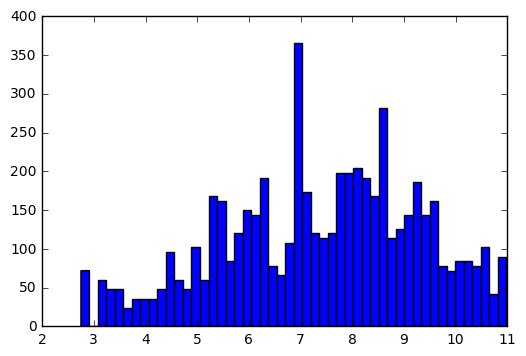

5688


In [138]:
# hydrogen_1 and hydrogen_2 distance in top site

oxygen = d_oxygen * np.matrix([0, 0, 1]).T
# angle made by water with surface
#orientation = -90

distance_hydrogen_atop = []
for [az,ay] in angles:
    Rz = rotatonMatrixZ(az)
    Ry = rotatonMatrixY(ay)
    hydrogen_1, hydrogen_2 = h1Inh20(orientation)
    
    hydrogen_1 = np.matmul(Rz, hydrogen_1)
    hydrogen_2 = np.matmul(Rz, hydrogen_2)
    
    hydrogen_1 = np.matmul(Ry, hydrogen_1)
    hydrogen_2 = np.matmul(Ry, hydrogen_2)
    
    
    hydrogen_1 = hydrogen_1 + np.matrix([0,0,d_oxygen]).T
    hydrogen_2 = hydrogen_2 + np.matrix([0,0,d_oxygen]).T

    distance_of_h1, distance_of_oxygen = aTop(hydrogen_1, oxygen, atop_pos)
    distance_of_h2, _ = aTop(hydrogen_2, oxygen, atop_pos)
    
    distance_hydrogen_atop += distance_of_h1 + distance_of_h2
    
plt.hist(distance_hydrogen_atop,50)
plt.show()
print(len(distance_hydrogen_atop))

## Bridge Site

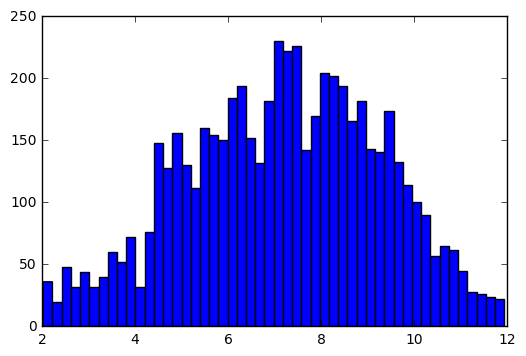

In [139]:
a = 2.77
d_per = np.sqrt((3 * d_oxygen**2 - a**2)/3)

oxygen = d_per * np.matrix([0, 0, 1]).T
# angle made by water with surface
#orientation = -90
distance_hydrogen_bridge = []
for [az,ay] in angles:
    Rz = rotatonMatrixZ(az)
    Ry = rotatonMatrixY(ay)
    hydrogen_1, hydrogen_2 = h1Inh20(orientation)
    
    hydrogen_1 = np.matmul(Rz, hydrogen_1)
    hydrogen_2 = np.matmul(Rz, hydrogen_2)
    
    hydrogen_1 = np.matmul(Ry, hydrogen_1)
    hydrogen_2 = np.matmul(Ry, hydrogen_2)
    
    
    hydrogen_1 = hydrogen_1 + np.matrix([0,0,d_per]).T
    hydrogen_2 = hydrogen_2 + np.matrix([0,0,d_per]).T

    distance_of_h1, distance_of_oxygen = aTop(hydrogen_1, oxygen, bridge_pos)
    distance_of_h2, _ = bridge(hydrogen_2, oxygen, bridge_pos)
    
    distance_hydrogen_bridge += distance_of_h1 + distance_of_h2
    
plt.hist(distance_hydrogen_bridge,50)
plt.show()

## Hollow site

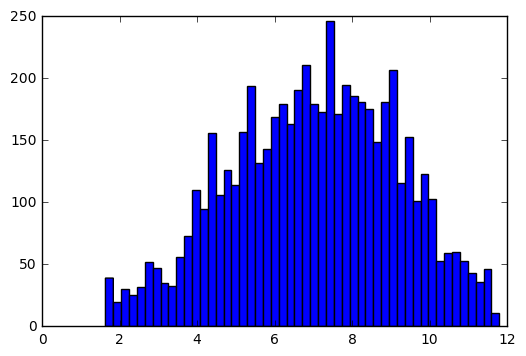

In [140]:
a = 2.77

d_per = np.sqrt(d_oxygen**2 - a**2/2)
oxygen = d_per * np.matrix([0, 0, 1]).T
# angle made by water with surface
#orientation = -90
distance_hydrogen_hollow = []
for [az,ay] in angles:
    Rz = rotatonMatrixZ(az)
    Ry = rotatonMatrixY(ay)
    hydrogen_1, hydrogen_2 = h1Inh20(orientation)
    
    hydrogen_1 = np.matmul(Rz, hydrogen_1)
    hydrogen_2 = np.matmul(Rz, hydrogen_2)
    
    hydrogen_1 = np.matmul(Ry, hydrogen_1)
    hydrogen_2 = np.matmul(Ry, hydrogen_2)
    
    
    hydrogen_1 = hydrogen_1 + np.matrix([0,0,d_per]).T
    hydrogen_2 = hydrogen_2 + np.matrix([0,0,d_per]).T

    distance_of_h1, distance_of_oxygen = aTop(hydrogen_1, oxygen, hollow_pos)
    distance_of_h2, _ = hollow(hydrogen_2, oxygen, bridge_pos)
    
    distance_hydrogen_hollow += distance_of_h1 + distance_of_h2
    
plt.hist(distance_hydrogen_hollow,50)
plt.show()

## Combined histogram

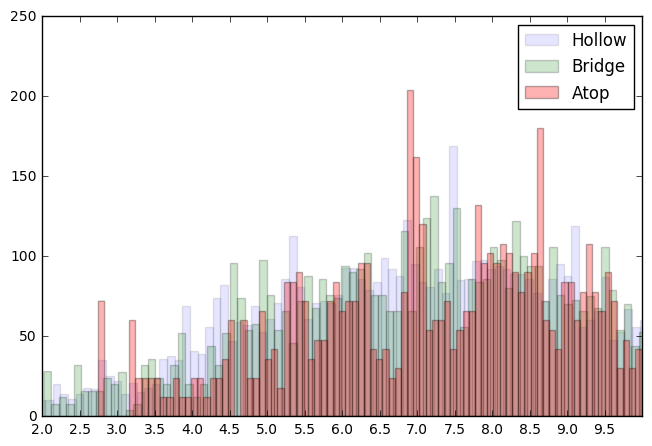

In [141]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.hist(distance_hydrogen_hollow,100, color='blue', alpha =  0.1, label = 'Hollow')
plt.hist(distance_hydrogen_bridge,100, color='green', alpha =  0.2, label = 'Bridge')
plt.hist(distance_hydrogen_atop, 100, color='red', alpha =  0.3, label = 'Atop')
plt.xlim([2,10])
plt.xticks(np.arange(2,10,0.5))
#plt.vlines(3.68, 0, 50)
plt.legend(loc = 1)

#plt.savefig('../PtWaterAdsorption/parallel.ps', dpi =100)
plt.show()


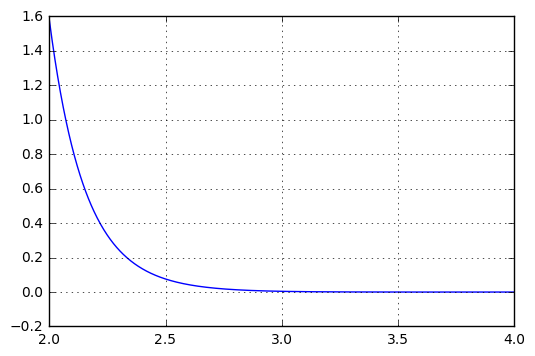

In [93]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def potential(A,B,C,r):
    return A/r**12 - B/r**10 + C/r**3


def f(A, B, C):
    plt.figure(2)
    r = np.linspace(2, 4, num=1000)
    plt.plot(r, potential(A, B, C, r))
    plt.grid()
    #plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, A=(0,10000,1), B=(0,1000,1), C=(0,1000,1))
output = interactive_plot.children[-1]
output.layout.height = '250px'
interactive_plot


In [125]:
a=[]+[1,2,3]

In [126]:
a

[1, 2, 3]